In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import figure

In [2]:
NL_df = pd.read_csv("https://raw.githubusercontent.com/Raunak7-09/Live-Project/296aebc042c6ba64ccc0959212a3fd15e41a0a33/Preprocessed_data.csv?token=APRB4NKQCMJBEHGVGPG7UAS65YLUA")
NL_df.head(10)

,frame.number,frame.time,frame.len,eth.src,eth.dst,ip.src,ip.dst,ip.proto,ip.len,tcp.len,tcp.srcport,tcp.dstport,Value,normality
0,1,1.237230e+14,54,8.797200e+13,1.672760e+14,1.921680e+08,1.921680e+09,6,40.0,0.0,49279.0,80,-99.0,0
1,2,1.237230e+14,62,8.797200e+13,1.672760e+14,1.921680e+08,1.921680e+09,6,48.0,0.0,56521.0,80,-99.0,0
2,3,1.237230e+14,62,1.672760e+14,8.797200e+13,1.921680e+09,1.921680e+08,6,48.0,0.0,80.0,56521,-99.0,0
3,4,1.237230e+14,54,1.672760e+14,8.797200e+13,1.921680e+09,1.921680e+08,6,40.0,0.0,80.0,49279,-99.0,0
4,5,1.237230e+14,54,8.797200e+13,1.672760e+14,1.921680e+08,1.921680e+09,6,40.0,0.0,56521.0,80,-99.0,0
5,6,1.237230e+14,54,8.797200e+13,1.672760e+14,1.921680e+08,1.921680e+09,6,40.0,0.0,49279.0,80,-99.0,0
6,7,1.237230e+14,269,8.797200e+13,1.672760e+14,1.921680e+08,1.921680e+09,6,255.0,215.0,56521.0,80,62.0,1
7,8,1.237230e+14,54,1.672760e+14,8.797200e+13,1.921680e+09,1.921680e+08,6,40.0,0.0,80.0,56521,-99.0,0
8,9,1.237230e+14,288,1.672760e+14,8.797200e+13,1.921680e+09,1.921680e+08,6,274.0,234.0,80.0,56521,-99.0,0
9,10,1.237230e+14,54,8.797200e+13,1.672760e+14,1.921680e+08,1.921680e+09,6,40.0,0.0,56521.0,80,-99.0,0


# <b>Frame Number</b>

Frame Number in network logs of IoT is nothing but a unit of data transmission in different layers of Iot which is unconventional. It ensures the analysis over the data transmission, its speed, low processing clocks, high density data loading.

In [3]:
## renaming the columns name
NL_df1 = NL_df.rename(columns = {'frame.number': 'fnumber','frame.time': 'ftime','frame.len': 'flen',
                               'eth.src': 'esrc','eth.dst': 'edst','ip.src': 'ipsrc','ip.dst': 'ipdst',
                               'ip.porto': 'iproto','ip.len': 'iplen','tcp.len': 'tlen',
                               'tcp.srcport': 'tsport','tcp.dstport': 'tdport'})
NL_df1.head(10)

,fnumber,ftime,flen,esrc,edst,ipsrc,ipdst,ip.proto,iplen,tlen,tsport,tdport,Value,normality
0,1,1.237230e+14,54,8.797200e+13,1.672760e+14,1.921680e+08,1.921680e+09,6,40.0,0.0,49279.0,80,-99.0,0
1,2,1.237230e+14,62,8.797200e+13,1.672760e+14,1.921680e+08,1.921680e+09,6,48.0,0.0,56521.0,80,-99.0,0
2,3,1.237230e+14,62,1.672760e+14,8.797200e+13,1.921680e+09,1.921680e+08,6,48.0,0.0,80.0,56521,-99.0,0
3,4,1.237230e+14,54,1.672760e+14,8.797200e+13,1.921680e+09,1.921680e+08,6,40.0,0.0,80.0,49279,-99.0,0
4,5,1.237230e+14,54,8.797200e+13,1.672760e+14,1.921680e+08,1.921680e+09,6,40.0,0.0,56521.0,80,-99.0,0
5,6,1.237230e+14,54,8.797200e+13,1.672760e+14,1.921680e+08,1.921680e+09,6,40.0,0.0,49279.0,80,-99.0,0
6,7,1.237230e+14,269,8.797200e+13,1.672760e+14,1.921680e+08,1.921680e+09,6,255.0,215.0,56521.0,80,62.0,1
7,8,1.237230e+14,54,1.672760e+14,8.797200e+13,1.921680e+09,1.921680e+08,6,40.0,0.0,80.0,56521,-99.0,0
8,9,1.237230e+14,288,1.672760e+14,8.797200e+13,1.921680e+09,1.921680e+08,6,274.0,234.0,80.0,56521,-99.0,0
9,10,1.237230e+14,54,8.797200e+13,1.672760e+14,1.921680e+08,1.921680e+09,6,40.0,0.0,56521.0,80,-99.0,0


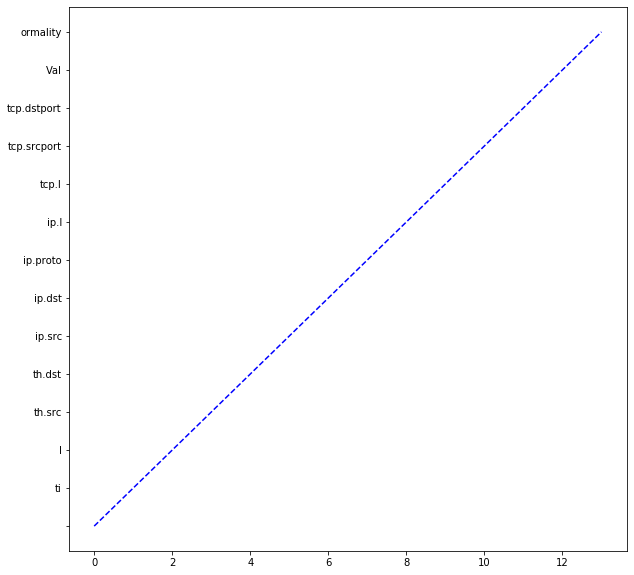

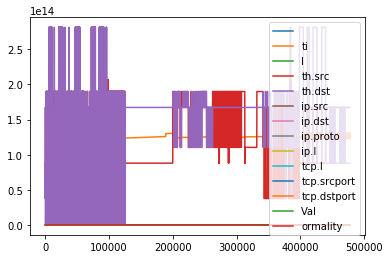

In [4]:
data = NL_df.columns.str.strip('frame.number')
NL_df.columns = data
plt.figure(figsize=(10,10))
plt.plot(NL_df.columns, 'b--')
NL_df.plot();

## Observations:
The Above graph signifies the activness of the individual frame in its diffrent layers activity, which is either the activity readings of ethernet, IP or TCP sub-layers and integrated source, destination, length or protocol.

# frame.time

In telecommunication networks, the frame.time is the amount of time from the beginning until the end of a message transmission. In the case of a digital message, it is the time from the first bit until the last bit of a message has left the transmitting node. Packet transmission time = Packet size / Bit rate.


# frame.len

Essentially, data sent over Ethernet is carried by the frame. An Ethernet frame(frame.len) is between 64 bytes and 1,518 bytes big, depending on the size of the data to be transported.


# eth.src

In computer networking, an Ethernet frame is a data link layer protocol data unit and uses the underlying Ethernet physical layer transport mechanisms. In other words, a data unit on an Ethernet link transports an Ethernet frame as its payload.


# eth.dst

It is same as eth.src but the payloads is transmitted to the receiver's ethernet layer.


# ip.src 

Using intellectual property (IP) data, we take a gander at how the internet of things is evolving, who the key players are, and what we might expect in the not-too-distant future. Under this sanction the receivers IP speed is shifted.


# ip.dst

Actually it is the response to the source(ip.src) at the specific rate.


# tcp.len

It is the transmission control protocol bit length acceptance and response.


# tcp.srcport

Gives the uploading rate of the data transmitted.


# tcp.dstport

Shows the downloading rate of the data received.


# value

Low power sensor devices generally exist in a Wireless Sensor Network (WSN). This applies to Log Data as the value is often not simply found in the data of log data and IoT data.


# normality

The condition of being normal; the state of being usual, typical, or expected is termed as normality. Here the normality signifies the extent of data similiarity between the previous data transmitted.

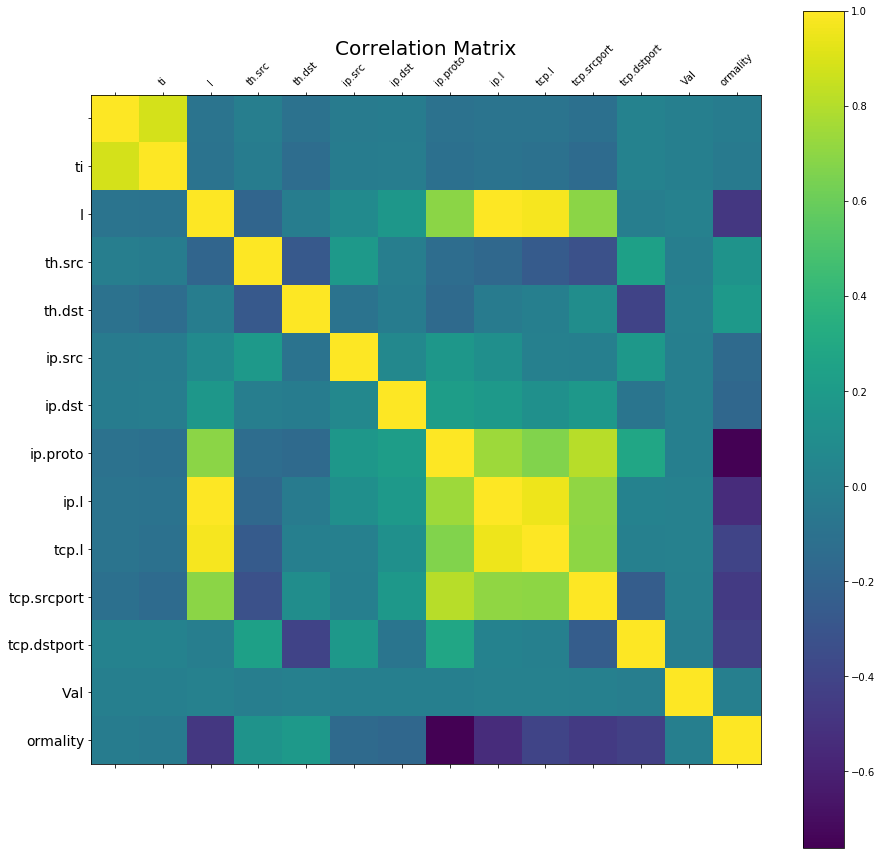

In [5]:
f = plt.figure(figsize=(15, 15))
plt.matshow(NL_df.corr(), fignum=f.number)
plt.xticks(range(NL_df.shape[1]), NL_df.columns, fontsize=10, rotation=45)
plt.yticks(range(NL_df.shape[1]), NL_df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=20);

## Observations :

The above graph resembles which variables need to be studied in pairs, so as to get to the conclusions for defining the IDS of IoT Network Logs. From this graph we will plot some informative graphs in upcoming inlets which would lead to some decisive conclusion.

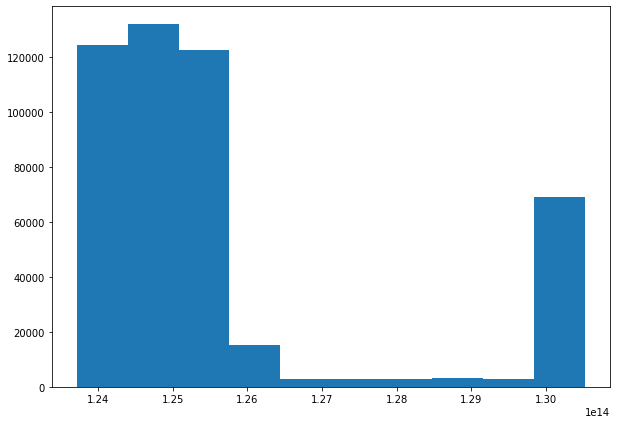

In [6]:
plt.figure(figsize=[10,7])
framenumber_df = NL_df.iloc[:,0]
frametime_df = NL_df.iloc[:,1]
n, bin, patches = plt.hist(frametime_df, )
plt.show()

### It shows the duration of the data transmission between the ends of the port. And at the same side it shows the time of the bit from starting to the end.

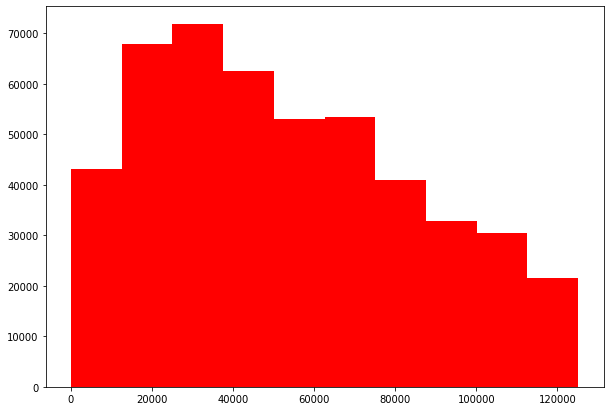

In [7]:
plt.figure(figsize=[10,7])
n, bin, patches = plt.hist(framenumber_df, color = 'red')
plt.show()

### The graph delivers that which individual frame number is standing out to its working policy i.e. speed processing, low load and large data transmission.

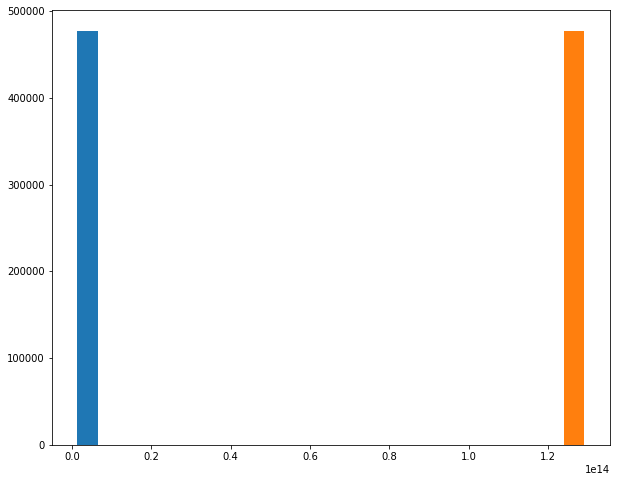

In [8]:
plt.figure(figsize=[10,8])
x = framenumber_df
y = frametime_df
n, bins, patches = plt.hist([x, y])

### This graph signifies that the time series over x-axis is in logarithmic unit(micro seconds/milli seconds) which implies that the framenumber and frametime duration of activeness. In ths we can see that individual frame enables in no time but but frame time eats a bit of time.

In [9]:
framelen_df = NL_df.iloc[:,2]
ipproto_df = NL_df.iloc[:,7]
iplen_df = NL_df.iloc[:,8]
tcplen_df = NL_df.iloc[:,9]
tsport_df = NL_df.iloc[:,10]
normality_df = NL_df.iloc[:,13]

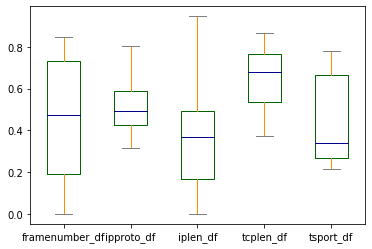

In [10]:
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange',
         'medians': 'DarkBlue', 'caps': 'Gray'}
df = pd.DataFrame(np.random.rand(10, 5), columns=['framenumber_df', 'ipproto_df', 'iplen_df', 'tcplen_df', 'tsport_df'])
df.plot.box(color=color, sym='r+')

### This graph groups the dataframes in the plot box with correspondings of it occurance and also emphasis its mean which equalizes the major of the box's group at one value. 

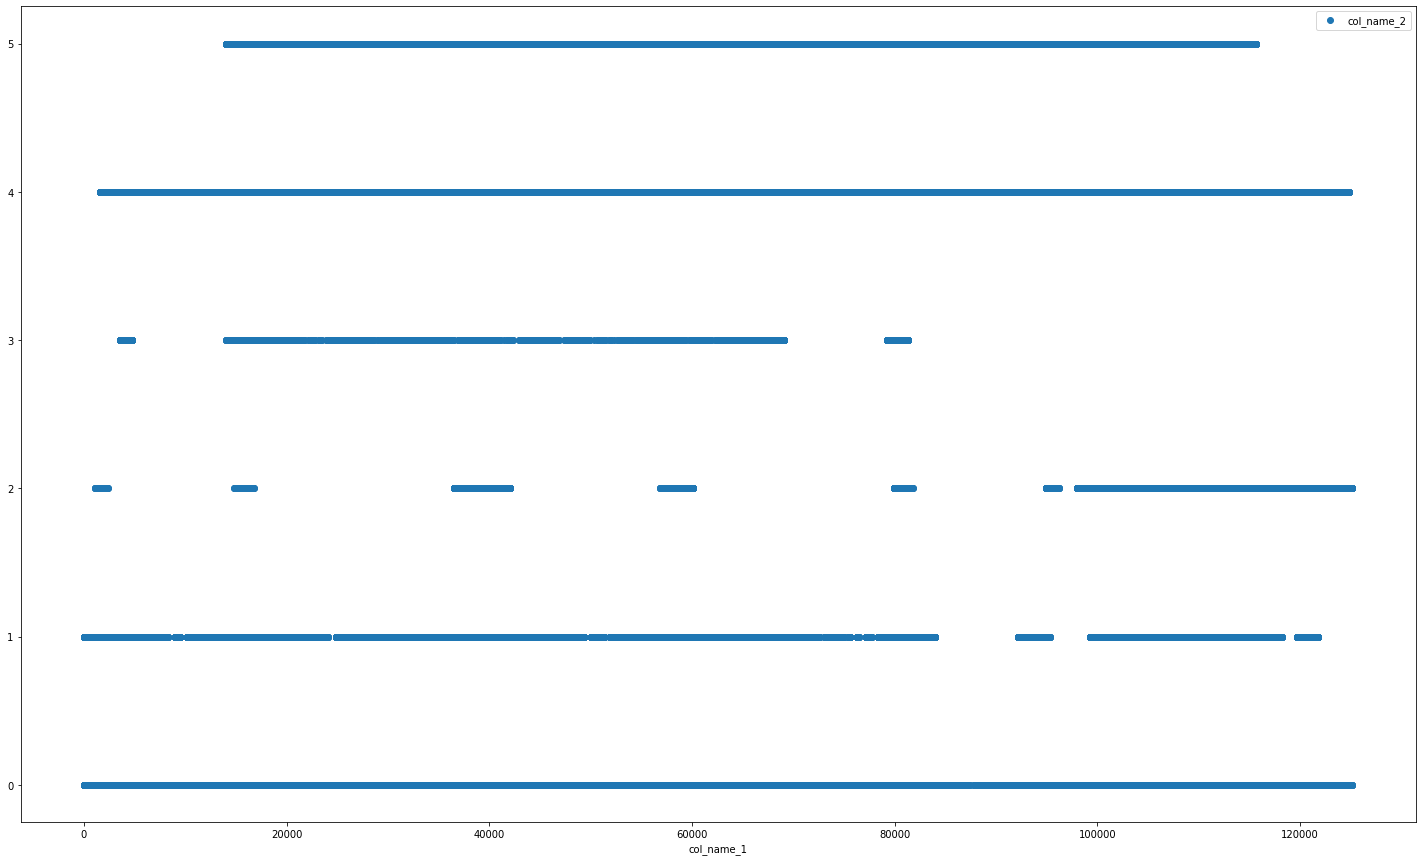

In [11]:
sample_df={'col_name_1': framenumber_df,
      'col_name_2': normality_df}
df= pd.DataFrame(sample_df)
df.plot(x='col_name_1', y='col_name_2', style='o', figsize = [25,15]);

### Each frame number keeps the historic of the componets, which decides the normality acceptance of the frame number. 